<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **30** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data using Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload the file into your current Jupyter environment using the upload button in your Jupyter interface. Ensure that the file is in the same folder as your working .ipynb file.

Step 2: If working in a local Jupyter environment, use the "Upload" button in your Jupyter interface to upload the Jobs_API notebook into the same folder as your current .ipynb file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Open the Jobs_API notebook, and run all the cells to start the Flask application. Once the server is running, you can access the API from the URL provided in the notebook.

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [4]:
import requests # you need this module to make an API call
import pandas as pd

In [5]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [6]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [7]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [8]:
print(data)   # print the data just to check the output or for debugging

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


Print the number of astronauts currently on ISS.


In [9]:
print(data.get('number'))

12


Print the names of the astronauts currently on ISS.


In [10]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astronauts on ISS
And their names are :
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [11]:
#Import required libraries
import pandas as pd
import json


https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



In [12]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

def get_number_of_jobs_T(technology):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
    else:
        data = []
    
    number_of_jobs = 0
    tech_lower = technology.lower()
    for job in data:
        title = job.get("Job Title", "").lower()
        if tech_lower in title:
            number_of_jobs += 1
    return technology,number_of_jobs


Calling the function for Python and checking if it works.


In [13]:
get_number_of_jobs_T("Python")

('Python', 191)

#### Write a function to find number of jobs in US for a location of your choice


In [14]:
 def get_number_of_jobs_L(location):
 
    response = requests.get(api_url)
    
    if response.status_code == 200:
        data = response.json()
    else:
        # Return the location with 0 jobs if API request fails
        return location, 0
    
    number_of_jobs = 0
    location_lower = location.lower()
    
    for job in data:
        job_location = job.get("Location", "").lower()
        if location_lower in job_location:
             number_of_jobs += 1
            
    return location, number_of_jobs

   

Call the function for Los Angeles and check if it is working.


In [15]:
get_number_of_jobs_L("Los Angeles")#your code goes here

('Los Angeles', 640)

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [16]:
technologies = [
    'Python', 'Java', 'C', 'C++', 'JavaScript', 
    'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 
    'PostgreSQL', 'MongoDB'
]



Import libraries required to create excel spreadsheet


In [17]:
!pip install openpyxl
from openpyxl import Workbook# your code goes here

Create a workbook and select the active worksheet


In [18]:
wb = Workbook()
ws = wb.active
ws.title = "Job Counts by Technology"
ws.append(['Technology', 'Number of Jobs'])# your code goes here

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [19]:
for tech in technologies:
    tech_name, job_count = get_number_of_jobs_T(tech)
    ws.append([tech_name, job_count])
    wb.save("tech_job_counts.xlsx")
print("Excel file 'tech_job_counts.xlsx' has been created.") #your code goes here

Excel file 'tech_job_counts.xlsx' has been created.


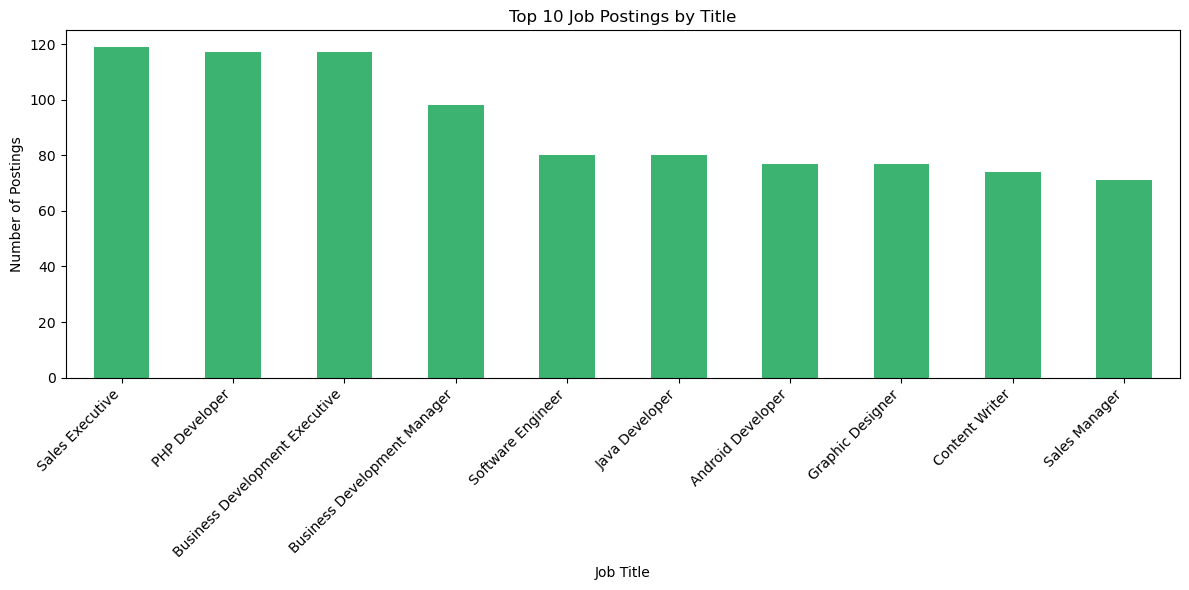

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the local JSON file
with open("jobs.json", "r") as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Count job titles
top_jobs = df['Job Title'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_jobs.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Job Postings by Title")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Save into an excel spreadsheet named **job-postings.xlsx**.


In [ ]:
wb.save("github_job-postings.xlsx")#your code goes here

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [33]:
# your code goes here
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
response = requests.get(api_url)
job_data = response.json() if response.status_code == 200 else []

# Define technologies to analyze
technologies = [
    'C', 'C#', 'C++', 'Java', 'JavaScript',
    'Python', 'Scala', 'Oracle', 'SQL Server',
    'MySQL Server', 'PostgreSQL', 'MongoDB'
]

# Count jobs per technology
tech_counts = []
for tech in technologies:
    count = 0
    tech_lower = tech.lower()
    for job in job_data:
        title = job.get("Job Title", "").lower()
        if tech_lower in title:
            count += 1
    tech_counts.append((tech, count))

 
wb = Workbook()
ws = wb.active
ws.title = "Technology Job Counts"
ws.append(["Technology", "Number of Jobs"])

 
for tech, count in tech_counts:
    ws.append([tech, count])
 
wb.save("job-postings.xlsx")
print("Excel file 'job-postings.xlsx' created successfully with technology job counts!")
post_data = {tech: count for tech, count in tech_counts}
 
post_response = requests.post("http://httpbin.org/post", json=post_data)

# Check and display results
if post_response.status_code == 200:
    print("\n POST request successful!")
    print("Response from httpbin.org:")
    
    # Extract and print relevant parts of response
    response_data = post_response.json()
    print(f"Status: {response_data.get('status', 'N/A')}")
    print(f"URL: {response_data.get('url', 'N/A')}")
    print(f"Data sent: {response_data.get('json', 'N/A')}")
else:
    print(f"\n POST request failed. Status code: {post_response.status_code}")


Excel file 'job-postings.xlsx' created successfully with technology job counts!

 POST request successful!
Response from httpbin.org:
Status: N/A
URL: http://httpbin.org/post
Data sent: {'C': 18323, 'C#': 117, 'C++': 80, 'Java': 980, 'JavaScript': 111, 'MongoDB': 17, 'MySQL Server': 0, 'Oracle': 206, 'PostgreSQL': 3, 'Python': 191, 'SQL Server': 41, 'Scala': 20}


## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © IBM Corporation.


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
